<a href="https://colab.research.google.com/github/carsonSgit/EclipseAnalysis/blob/main/EclipseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data visualization of Montreal's Total Solar Eclipse** (2024-05-08) 🌞🌑

**Temperature**, **humidity**, and **luminosity** data visualization captured on a reTerminal Raspberry Pi using an **AHT20 Temperature & Humidity sensor** & the reTerminal built-in **Luminosity sensor**.

There is also an **IsolationForest model** to highlight *data* *anomalies*. 📊🔍


# **Scientific measures/observations:**

- **Angle of Pi:** 📐 The Raspberry Pi's reTerminal was elevated with a 20° vertical angle to direct it more or less perpendicularly towards the sun's position in the sky.
- **Circumstances affecting data:** 🌍
  - Circumstances that **DIDN'T** affect data:
    - Weather conditions; if the skies were cloudy, if it was raining, if it had snowed (*elevation in UV rays prior to eclipse would melt snow which would then cool the air & cause a greater difference in humidity*).
  - Circumstances that **DID** affect data:
    - Interested bystanders (*kids, parents, etc.*) coming over to look at the data from the experiment (*charts*). This blocks the luminosity sensors & marginally alters the temperature/humidity.
    - The table-cloth being black might have had an effect on the temperature sensors as it holds heat more than other colours.
- **Notes/Decisions:** 📝
  - Could not connect to Pi for development on school internet, had to hotspot from cell data.
  - Had to reformat/modify code to accurately display & track temperature/humidity/luminosity data
  - Research appending to .CSV's in Python
- **Experiment setup**: 🛠️
  - Connect to Raspberry Pi through SSH
  - Remodel code & incorporate luminosity tracking
  - Ensure all tracked data can be viewed on localhosted dashboard
  - Ensure that all sensor readings are being appending to "measurements.csv"
  - Setup Pi outside in view of sun
  - Run device_controller.py script
- **Hypothesis:** 🤔
  - As we approach the eclipse; the temperature will continuously decrease as the sun is being overshadowed, the humidity will increase as there is less heat in each air molecule which then leads to the molecules releasing moisture, and the luminosity will decrease significantly until it hits a near-zero low during totality.
- **Overall Result analysis:** 📊
  - As hypothesized, the temperature & luminosity decreased while the humidity increased. The data was satisfactory with marginal flaws stemming from attendees' interest in the experiment.


# Prep data from CSV 📊
Read data from the CSV & format columns to prepare for data display. 📝


In [1]:
import pandas as pd
import re

# Read the CSV from my GitHub repo (having it saved in local colab file gets it deleted each new runtime)
url = 'https://raw.githubusercontent.com/carsonSgit/EclipseAnalysis/main/measurements.csv'
df = pd.read_csv(url, header=None)

# Extract numbers from string entries and remove square brackets
def extract_numbers(text):
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", text)
    return float(numbers[0])

# Columns 1, 2, 3 have messy formatting (Temp, Humid, Luxe)
for column in df.columns[1:]:
    df[column] = df[column].apply(extract_numbers)

# Rename columns
df.rename(columns={0: 'Time', 1: 'Celsius', 2: 'Humidity', 3: 'Luminosity'}, inplace=True)

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# df['Time'] = df['Time'].dt.strftime('%H:%M:%S')


# Temperature Plot 🌡️
The temperature is measured in Celsius but we can clearly tell that the numbers are inflated. This is probably due to the sensor measuring off of light/relative heat. Because the UV rays of the sun were at a high & the sensor was left in the sun's view for an hour, it essentially was baking itself which kept the values higher than they actually would've been (at its lowest it displays 14.38 Celsius which was certainly not the actual lowest). 🌞🔍


In [2]:
import plotly.graph_objs as go

# Creating the plot
fig = go.Figure()

# make plot line
fig.add_trace(go.Scatter(x=df['Time'], y=df['Celsius'], mode='lines', name='Temperature'))

# layoout cooking
fig.update_layout(
    title='Temperature Over Time',
    xaxis=dict(title='Time', tickangle=45),
    yaxis=dict(title='Temperature (Celsius)'),
    showlegend=True,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    template='plotly_white'
)


# show plot
fig.show()


# Humidity Plot 💧
A plot that shows the increase in humidity. We see the rise of humidity thanks to the drop of temperature which makes air hold onto moisture less thanks to the relative humidity phenomenon (basically slower-moving molecules have a harder time holding onto moisture in the air) 🌡️🔍


In [3]:
# init humidity plot
fig_humidity = go.Figure()

# plotting line for humidity data
fig_humidity.add_trace(go.Scatter(x=df['Time'], y=df['Humidity'], mode='lines', name='Humidity', line=dict(color='blue')))

fig_humidity.update_layout(
    title='Humidity Over Time',
    xaxis=dict(title='Time', tickangle=45),
    yaxis=dict(title='Humidity'),
    showlegend=True,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    template='plotly_white'
)

# show the humidity plot
fig_humidity.show()

# Luminosity Plot 💡
A chart displaying the luminosity levels from the eclipse. The sporadic dips are due to people coming over to look at our Pi, blocking the sensors. The important and cool part is the near bottoming-out close to the total eclipse & once it was reached. 🌑🔍


In [4]:

# Create Luminosity plot
fig_luminosity = go.Figure()

# plot the line for the luminosity data
fig_luminosity.add_trace(go.Scatter(x=df['Time'], y=df['Luminosity'], mode='lines', name='Luminosity', line=dict(color='green')))

# tha layout for luminosity plot
fig_luminosity.update_layout(
    title='Luminosity Over Time',
    xaxis=dict(title='Time', tickangle=45),
    yaxis=dict(title='Luminosity'),
    showlegend=True,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    template='plotly_white'
)

# show the Luminosrity plot
fig_luminosity.show()

# IsolationForest Model 🌲
Using an Isolation Forest model, we can predict (display) the anomalies from the Total Solar Eclipse. 🔍📊


In [5]:
from sklearn.ensemble import IsolationForest

# feature selection..
features = ['Celsius', 'Humidity', 'Luminosity']
X = df[features]

# model training..
clf = IsolationForest(contamination=0.1)
clf.fit(X)

# "predict" anomalies
df['Anomaly'] = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



# Visualize anomalies 📈
Plot all anomalies found in the data.


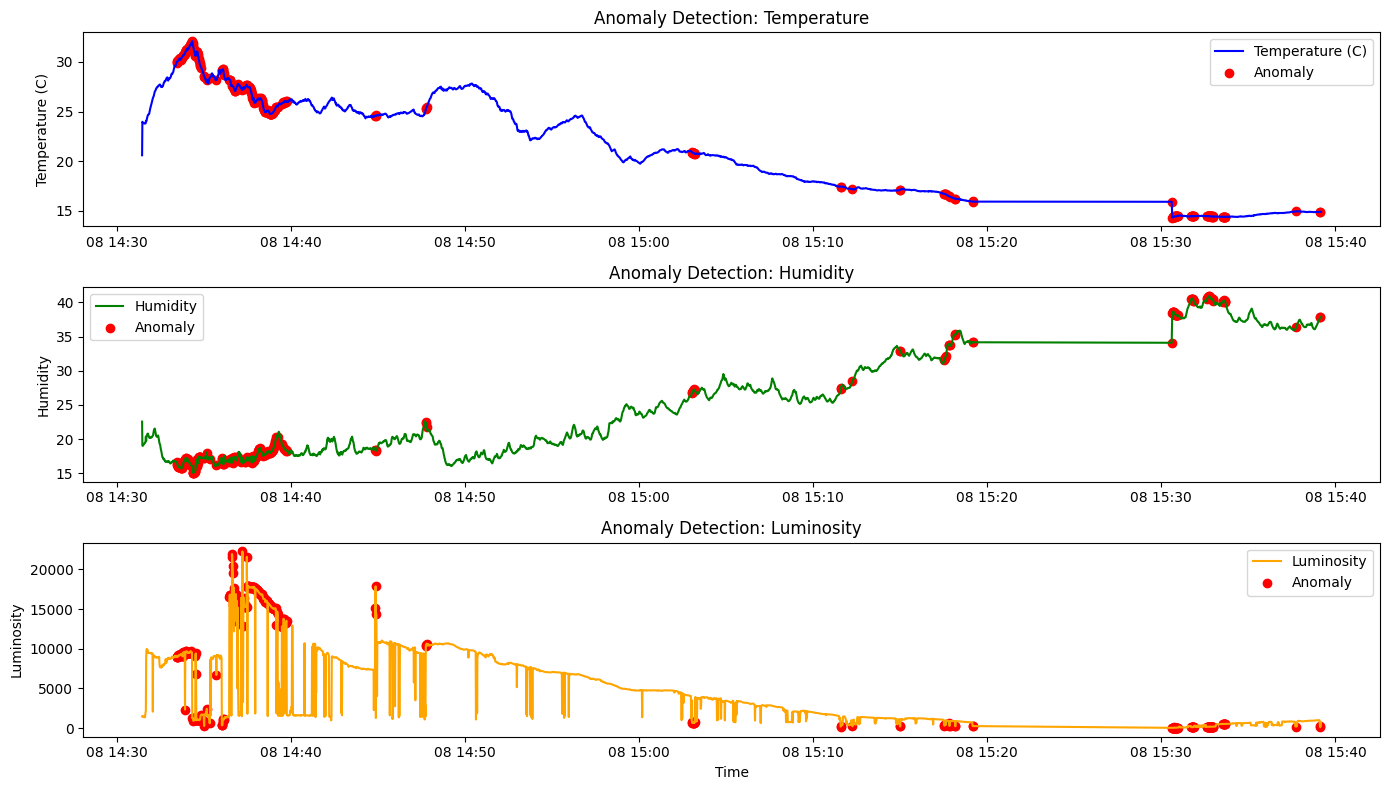

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Making a Temperature subplot :p
plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Celsius'], label='Temperature (C)', color='blue')
plt.scatter(df[df['Anomaly'] == -1]['Time'], df[df['Anomaly'] == -1]['Celsius'], color='red', label='Anomaly')
plt.ylabel('Temperature (C)')
plt.title('Anomaly Detection: Temperature')
plt.legend()

# Making the Humidity subplot
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Humidity'], label='Humidity', color='green')
plt.scatter(df[df['Anomaly'] == -1]['Time'], df[df['Anomaly'] == -1]['Humidity'], color='red', label='Anomaly')
plt.ylabel('Humidity')
plt.title('Anomaly Detection: Humidity')
plt.legend()

# Making te Luminosity subplot
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Luminosity'], label='Luminosity', color='orange')
plt.scatter(df[df['Anomaly'] == -1]['Time'], df[df['Anomaly'] == -1]['Luminosity'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Luminosity')
plt.title('Anomaly Detection: Luminosity')
plt.legend()

plt.tight_layout()
plt.show()